#Model Extension:#
To give our model a more realistic approach, we include the concept of “white” agents in our model. In our model expansion, we keep 41 percent of blue agents as fixed, meaning there are a certain group of people who are non- gamers and do not get influenced by interactions from neighbours or online networking. They also have a significant impact on gaming agents in our dynamic setup. We run again all the three stages of our model but now with this concept of fixed agents (white agents) along with all interventions.  

From the literarture "The non-gamer. Technical report, University Carlos III de Madrid," we identified a demographic known as non-gamers: individuals who never play games. Our study also includes this population. By consulting existing literature, we found that approximately 41% of the population falls into this category. Therefore, we designated 41% of the blue agents as white agents, setting their scores permanently to 1.

Stage 1 & Stage 2 are re-run with the new idea of fixed agents while we further integrate new concepts for stage 3 along with fixed agents which is shown in the next section.



# Stage One- Without Interventions#

Average score after time 0: 65.16483389060357


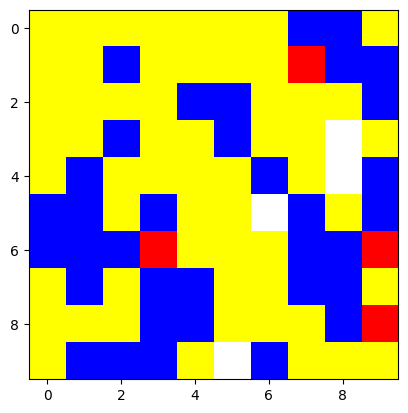

Average score after time 1: 65.3416495883583


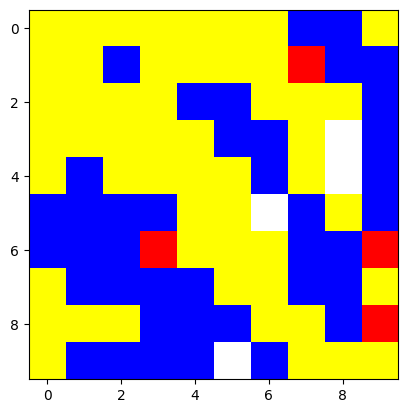

Average score after time 2: 65.74267959701967


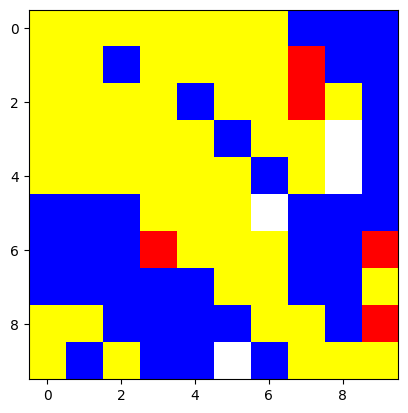

Average score after time 3: 66.70323412640695


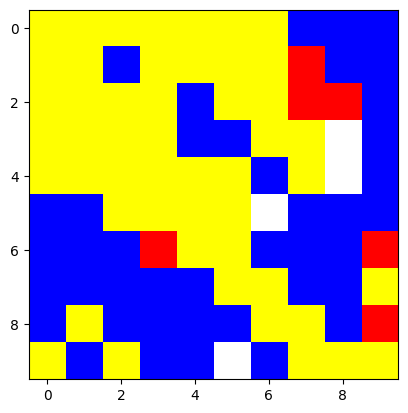

Average score after time 4: 68.33797935406386


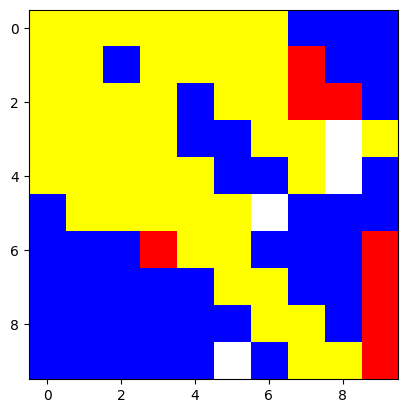

Average score after time 5: 71.0691481152078


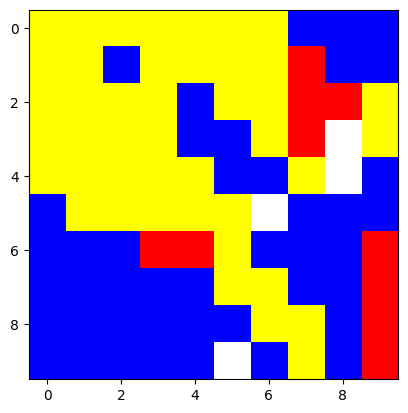

Average score after time 6: 75.01346509695628


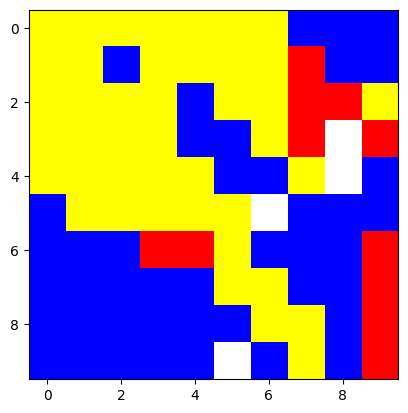

Average score after time 7: 80.05036078144809


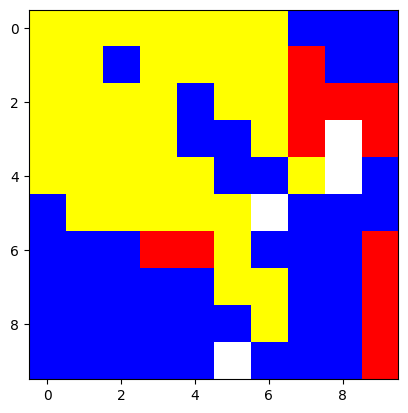

Average score after time 8: 86.47665648276293


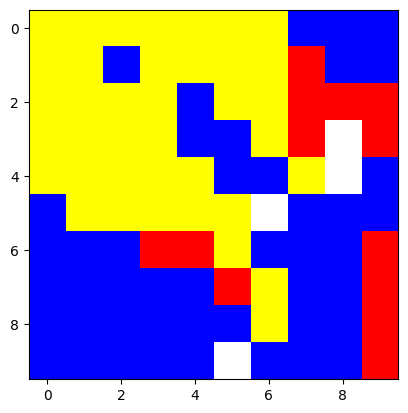

Average score after time 9: 94.5139805736438


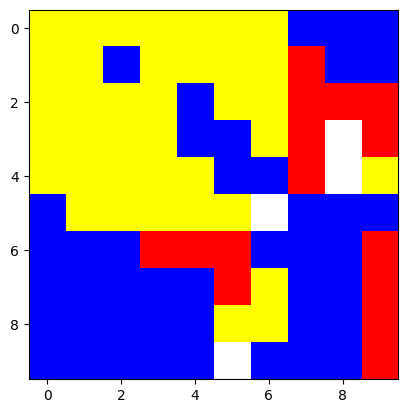

Average score after time 10: 69.21811977797533


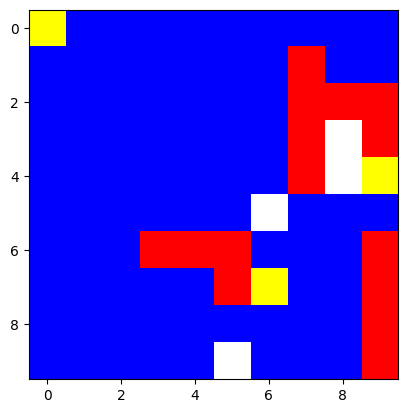

Average score after time 11: 55.34293722658582


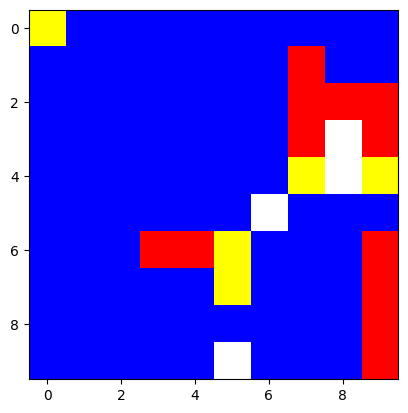

Average score after time 12: 47.016187638491395


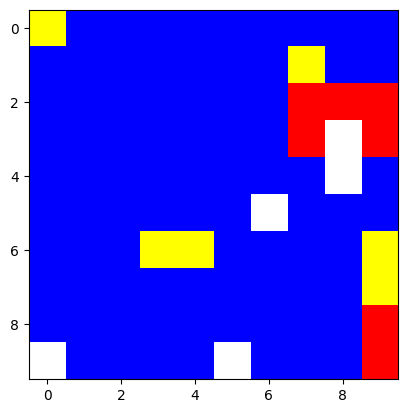

Average score after time 13: 41.78880850759779


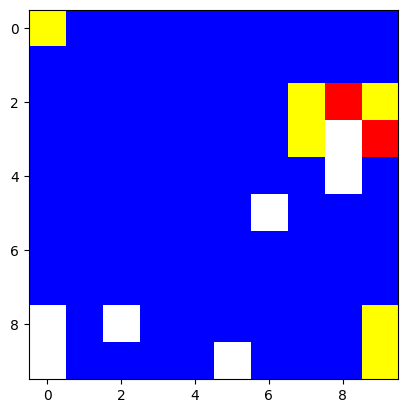

Average score after time 14: 38.600095369651825


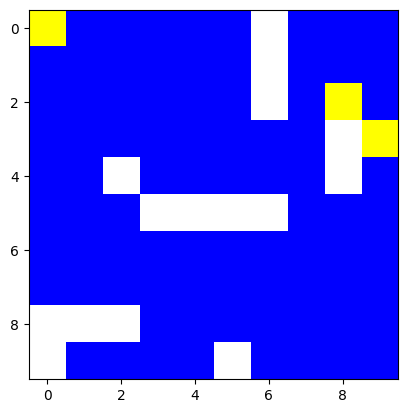

Average score after time 15: 37.053930291947786


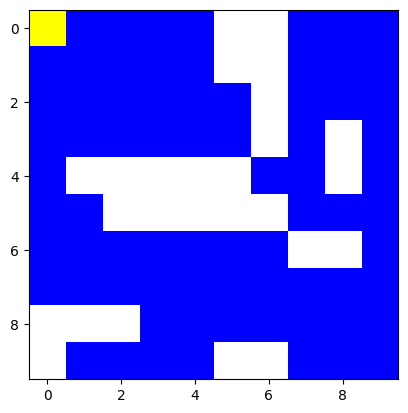

Average score after time 16: 36.439189477749025


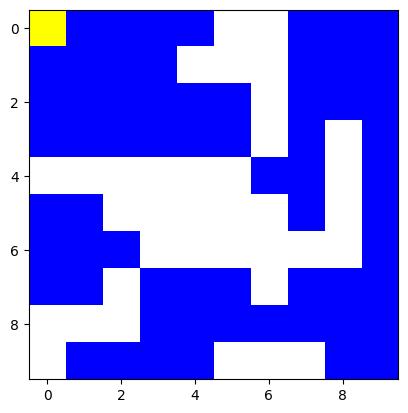

Average score after time 17: 36.18919548166512


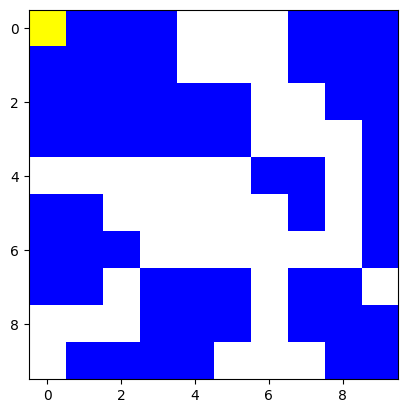

Average score after time 18: 36.10116295125763


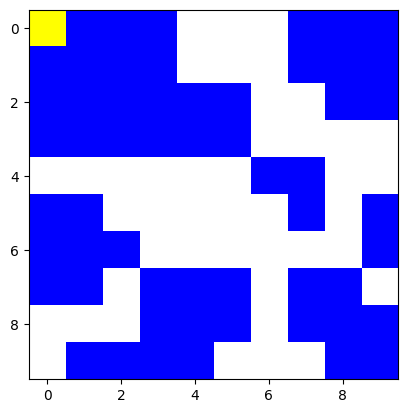

Average score after time 19: 36.075549907906755


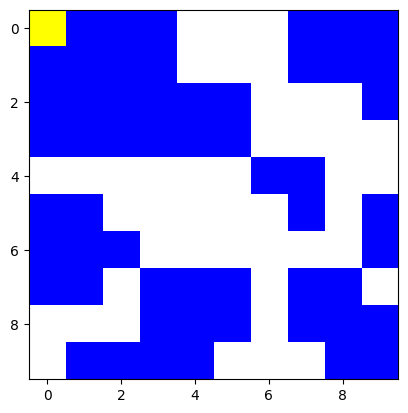

In [ ]:
#Stage 1- Without Interventions

import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(37)
random.seed(37)

# We define global variables
num_agents = 100
grid_size = 10


# Defining agent class
class Agent:
    def __init__(self, score):
        self.score = score
        self.fixed = False
        self.color = self.get_color()

    def get_color(self):
      if self.score >= 60:
        return (1.0, 0.0, 0.0)  # red
      elif self.score >= 30:
        return (1.0, 1.0, 0.0)  # yellow
      elif self.score <=1 :
        return (1.0, 1.0, 1.0)  # white
      else:
        return (0.0, 0.0, 1.0)  # blue

# Initializing agents with scores
agents = []
T0_percent_high_scores = 0.13
for i in range(num_agents):
    score = np.random.randint(60, 100) if i < num_agents * T0_percent_high_scores else np.random.randint(0, 60)
    agents.append(Agent(score))
    if i < num_agents * T0_percent_high_scores:
        score = np.random.randint(60, 100)
    else:
        score = np.random.randint(0, 60)
        agents.append(Agent(score))

# Marking 41% of blue agents as fixed
blue_agents = [agent for agent in agents if agent.score < 30]
num_fixed_blue_agents = int(0.41 * len(blue_agents))
for agent in blue_agents[:num_fixed_blue_agents]:
    agent.fixed = True

# Grid environment
grid = np.zeros((grid_size, grid_size), dtype=object)
remaining_agents = agents.copy() # List of remaining agents to place on the grid
for i in range(grid_size):
    for j in range(grid_size):
        index = np.random.randint(len(remaining_agents))
        agent = remaining_agents.pop(index) # Agent removed from the list of remaining agents
        grid[i, j] = agent
t0 = 0
t1 = 10
t2 = 20
for t in range(t2):
    # Average score for each agent's neighborhood
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        if agent.fixed: # Skip if the agent is fixed
            continue
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]
        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            if agent.score > 60:
                agent.score = (((agent.score * 2) + neighbor_avg_score)) / 2.0
                agent.color = agent.get_color()
            elif agent.score <= 1:
                 agent.score=0
            else:
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()

            #decay_rate = 1.1143112  # Decay rate for exponential decay
            decay_rate = 0.63112     # > 0.55

            if t > 9:  # meaning we are entering state t2 from t1
                agent.score *= np.exp(-decay_rate)  # decay score immediately after calculation

            agent.color = agent.get_color()

    # We update grid with updated agents
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        grid[row, col] = agent

    # after the score calculations
    total_score = sum(agent.score for agent in agents)
    average_score = total_score / num_agents
    print(f"Average score after time {t}: {average_score}")

    # Visualization of current state of the grid with colors
    plt.imshow([[agent.color for agent in row] for row in grid], interpolation='nearest')
    plt.show()







 **Extended Model Stage 1 interpretation:**
The behaviour is same as before as the baseline model i.e the average score gradually increases in the growing phase (T0 -> T1) and in the forgetting phase (T1 -> T2), there is a gradual decline in the average score due to the implementation of the Exponential decay factor.
We notice that the number of white agents gradually increases in the forgeting phase defining that the losing popularity of the game ends up turning more and more agents completely disinterested in playing the game.



# Stage One and Two including interventions

**Hypothesis:**
Taking a learning from Stage One and Two of the baseline model, prior to any model extension, we here hypothesize that with the effect of fixed white agents the addiction spread is less prominent.

**Actual Outcome:**
 Our ABM analysis approves the hypothesis. In a majority of the iterations, we noticed that the average scores during the growth phase were noticeably lower in scenarios incorporating fixed white agents, as compared to scenarios devoid of this concept.

A salient distinction emerges in our analysis when juxtaposed with our previous findings without the incorporation of white agents. In the earlier model, the interventions in the growing phase were not strong enough to reduce the scores at numerous timestamps subsequent to their implementation. However, in the revised model that integrates the concept of white agents, a majority of iterations display a decline in average scores during the growing phase post-intervention. This observation in a way determines the efficacy of the interventions in attenuating addiction within the contemporary Agent-Based Modeling (ABM) paradigm, suggesting a more grounded and realistic approach in the new model.




Average score after time 0: 38.51987955866938
Average score after including intervention(s) at time 0: 34.95690817027476
Average score after time 1: 37.019946458201005
Average score after including intervention(s) at time 1: 32.908170496164395
Average score after time 2: 34.97701935983247
Average score after including intervention(s) at time 2: 31.241437977610687
Average score after time 3: 33.289403775424404
Average score after including intervention(s) at time 3: 30.134549845259272
Average score after time 4: 32.49487326584667
Average score after including intervention(s) at time 4: 29.934467955390904
Average score after time 5: 32.7902638452722
Average score after including intervention(s) at time 5: 30.50374119205146
Average score after time 6: 33.4780188394663
Average score after including intervention(s) at time 6: 31.0394207253559
Average score after time 7: 34.43544097404563
Average score after including intervention(s) at time 7: 31.748657674103377
Average score after time 8: 

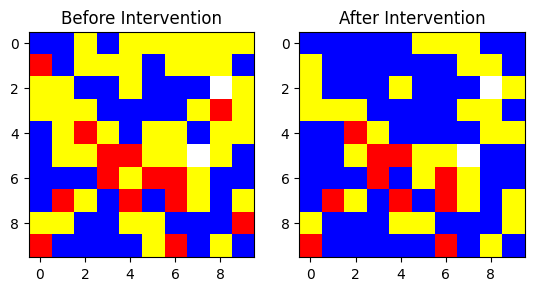

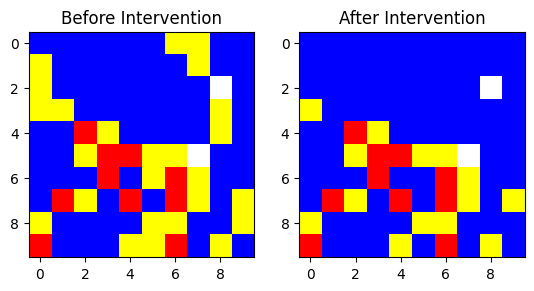

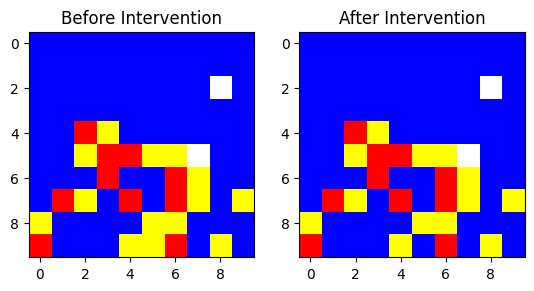

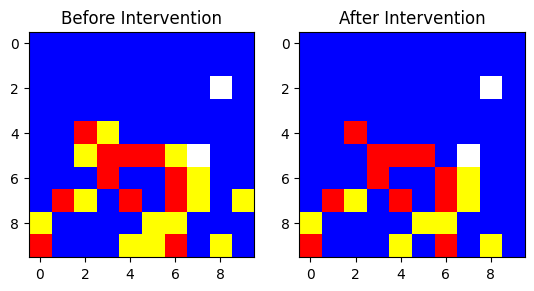

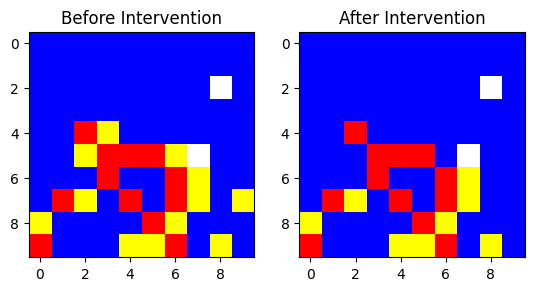

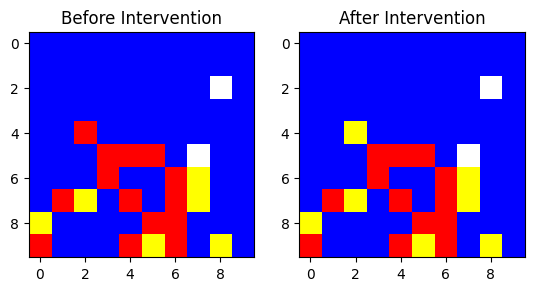

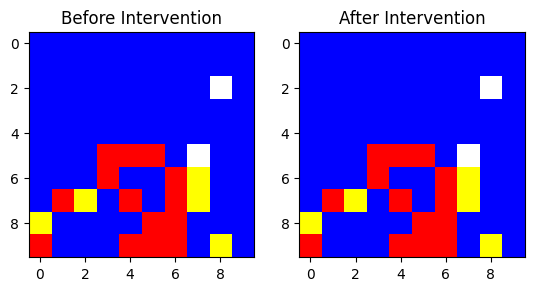

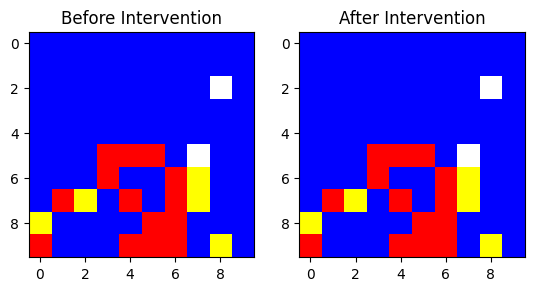

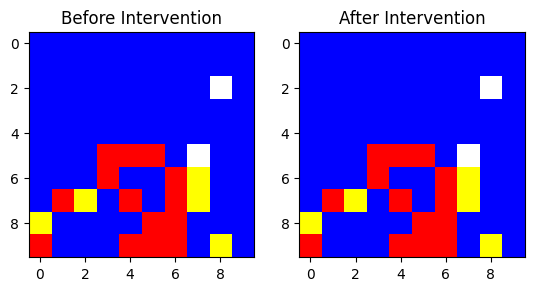

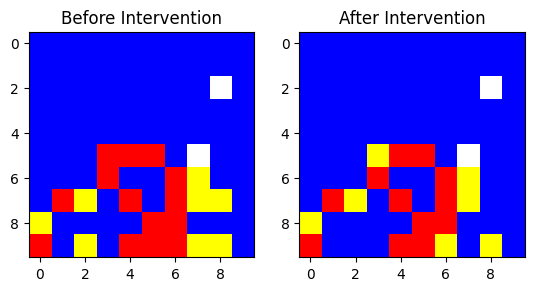

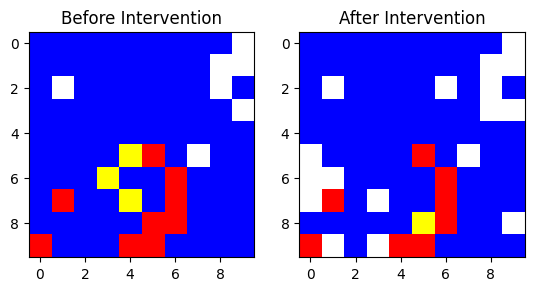

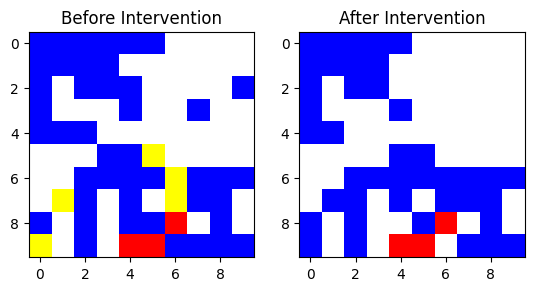

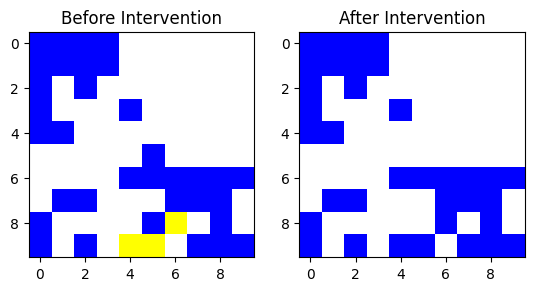

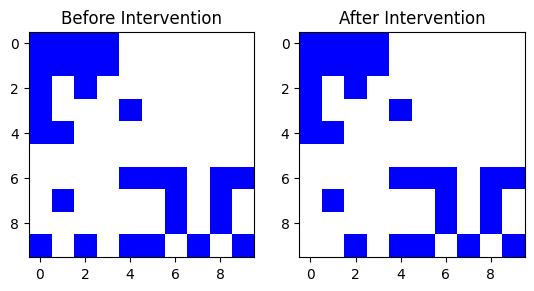

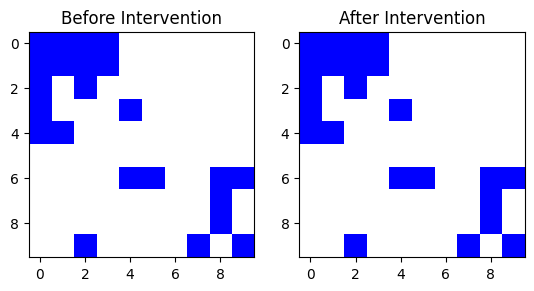

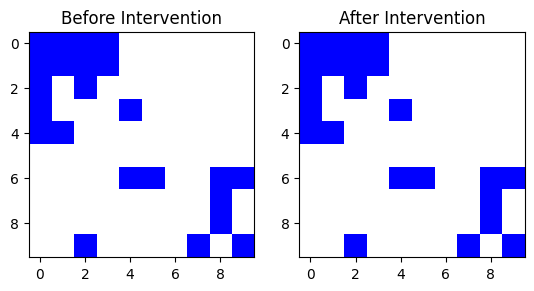

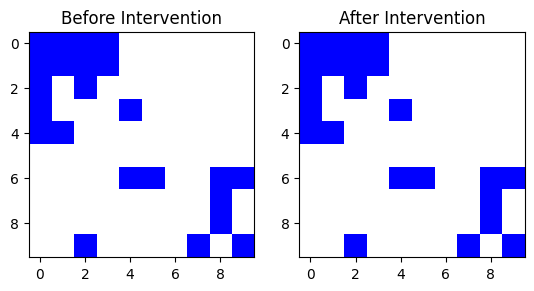

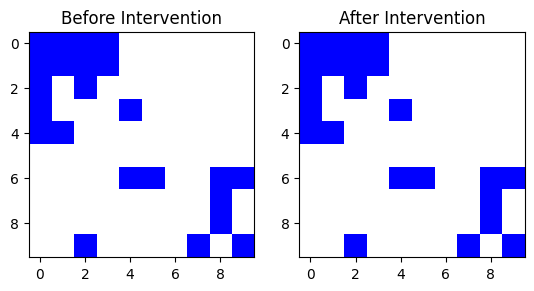

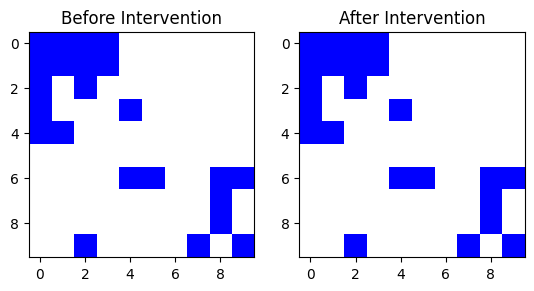

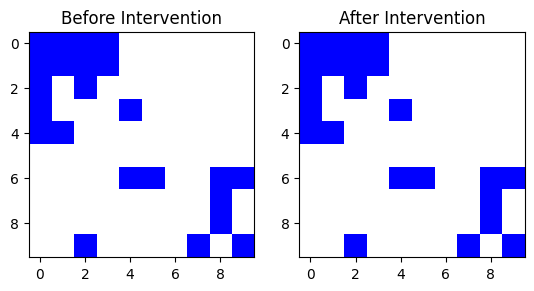

In [ ]:
#Stage One and Stage Two including interventions

import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(55)
random.seed(55)

# We define global variables
num_agents = 100
grid_size = 10
male_percentage = 0.85

#Defining agent class
class Agent:
    def __init__(self, score, gender, age, advertisement_exposure):
        self.score = score
        self.gender = gender
        self.age = age
        self.advertisement_exposure = advertisement_exposure
        self.color = self.get_color()

    def __str__(self):
        return f"Agent(score={self.score}, gender={self.gender}, age={self.age}, advertisement_exposure={self.advertisement_exposure})"

    def get_color(self):
      if self.score >= 60:
        return (1.0, 0.0, 0.0)  # red
      elif self.score >= 30:
        return (1.0, 1.0, 0.0)  # yellow
      elif self.score <= 1:
        return (1.0, 1.0, 1.0)  # white
      else:
        return (0.0, 0.0, 1.0)  # blue

# Age ranges and their corresponding percentages
age_ranges = [
    (0, 14, 0.09),
    (14, 19, 0.31),
    (19, 24, 0.21),
    (24, 30, 0.20),
    (30, 40, 0.13),
    (40, 60, 0.03),
    (60, 100, 0.03)
]

# First, we generate a list of ages according to the specified distribution:
age_list = []
T0_percent_high_scores = 0.13
for age_range in age_ranges:
    start, end, proportion = age_range
    num_in_range = int(proportion * num_agents)
    ages_in_range = np.random.randint(start, end, num_in_range)
    age_list.extend(ages_in_range)

# Then we ensure the list has the right size:
if len(age_list) < num_agents:
    age_list.extend(np.random.randint(0, 100, num_agents - len(age_list)))

t0 = 0
t1 = 10
t2 = 20
#decay_rate = 0.01143112  # Decay rate for exponential decay

attention_switching_effect_low = 0.11
attention_switching_effect_high = 0.19
Rationalization_Education_effect_low=0.17
Rationalization_Education_effect_high =0.02
Parental_Monitoring_effect_low=0.02
Parental_Monitoring_effect_high=0.10
Perceived_Cost_effect_low=0.13
Perceived_Cost_effect_high=0.02

# Advertisement impact on addiction score
advertisement_impact = 0.1
import random
# Initializing agents with scores, gender, age, and advertisement exposure
agents = []
for i in range(num_agents):
    if i < num_agents * T0_percent_high_scores:
        score = np.random.randint(60, 100)
    else:
        score = np.random.randint(0, 60)

    if i < num_agents * male_percentage:
        gender = 'Male'
    else:
        gender = 'Female'

    # Selecting age based on the provided age ranges and percentages
    age = age_list.pop(np.random.randint(len(age_list))) # Randomly selecting

    advertisement_exposure = np.random.rand()  # Generate a random value for advertisement exposure

    # Adjusting the agent's addiction score based on advertisement exposure
    score += advertisement_exposure * advertisement_impact
    score = max(0, min(score, 100))
    agents.append(Agent(score, gender, age, advertisement_exposure))
# Mark 41% of blue agents as fixed
blue_agents = [agent for agent in agents if agent.score < 30]
num_fixed_blue_agents = int(0.41 * len(blue_agents))
for agent in blue_agents[:num_fixed_blue_agents]:
    agent.fixed = True

# Grid environment: Recall Stefania suggested to use 2D Grid
grid = np.zeros((grid_size, grid_size), dtype=object)
for i in range(grid_size):
    for j in range(grid_size):
        index = np.random.randint(num_agents)
        grid[i, j] = agents[index]

for t in range(t2):
    # average score calculation for each agent's neighborhood
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]
        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            if agent.score > 60:
                agent.score = (((agent.score * 2) + neighbor_avg_score)) / 2.0
                agent.color = agent.get_color()
            elif agent.score <= 1:
                agent.score=0
                agent.color = agent.get_color()
            else:
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()

            decay_rate = 0.651296  # Decay rate for exponential decay

            if t > 9:  # meaning we are entering state t2 from t1
                agent.score *= np.exp(-decay_rate)  # decay score immediately after calculation

            agent.color = agent.get_color()

    # We update grid with updated agents
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        grid[row, col] = agent

    # after the score calculations
    total_score = sum(agent.score for agent in agents)
    average_score = total_score / num_agents
    print(f"Average score after time {t}: {average_score}")

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow([[agent.color for agent in row] for row in grid], interpolation='nearest')
    axs[0].set_title('Before Intervention')

    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]
        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            if agent.score > 60:
                agent.score *= (1 - attention_switching_effect_high)
                agent.score *= (1 - Rationalization_Education_effect_high)
                agent.score *= (1 - Parental_Monitoring_effect_high)
                agent.score *= (1 - Perceived_Cost_effect_high)
                agent.score = (agent.score * 2 + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()
            elif agent.score <= 1:
                 agent.score=0
            else:
                agent.score *= (1 - attention_switching_effect_low)
                agent.score *= (1 - Rationalization_Education_effect_low)
                agent.score *= (1 - Parental_Monitoring_effect_low)
                agent.score *= (1 - Perceived_Cost_effect_low)
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()

    axs[1].imshow([[agent.get_color() for agent in row] for row in grid], interpolation='nearest')
    axs[1].set_title('After Intervention')

    # after the score calculations
    total_score = sum(agent.score for agent in agents)
    average_score = total_score / num_agents
    print(f"Average score after including intervention(s) at time {t}: {average_score}")

#for agent in agents:
    #print(agent)

# Stage Three (Newtorking- Concept of Multiple Games)

Stage3: In our third-stage analysis, we expanded our focus from a single game to multiple games, with particular attention to the impact of networking effects. We observed that even if players aren't directly adjacent on the grid, as long as they share a favorite game, their mutual influence increases. When updating a player's score, we not only consider the average score of their direct neighbors but also factor in the average score of those players who share the same favorite game, assigning equal importance to both. To better integrate the impact of networking effects and the consideration of interaction quality, we now have introduced two new quantified indicators: Online Social Interaction Score (OSIS) and Interaction Quality Score (IQS). OSIS is based on the player's social interactions, while IQS is based on the player's positive and negative interactions.

In the simulation, we expanded the Agent class by adding the OSIS and IQS attributes. When initializing an agent, based on their social interactions and interaction quality, each agent is assigned an OSIS and IQS value. In the update of an agent's score, these two attributes are also integrated.

Drawing inspiration from the literature “The role of social motivation and sociability of gamers in online game addiction”, players were categorized as "Casual", "Highly Engaged", and "At-risk of addiction". These classifications corresponded with our “blue agents”, “yellow agents”, and “red agents” respectively.

**Parameter Selection**

1.Online Social Interaction Score (OSIS):
Introduced based on findings, we here indicate a positive correlation between online social interaction and game addiction.

Calculated using factors such as Social Self Efficacy, In-Game Friendship, and Social Motivation. The weights assigned to these factors, 10, 5, and 15 respectively, were derived from a comprehensive analysis of the aforementioned literature.

The formula used was:  
OSIS±=mean×weight.



2.Interaction Quality Score (IQS):
Introduced to capture the quality of online social interactions.
Derived from studies like "Online Gaming Addiction and Quality of Life among Early Adolescents in Thailand" which highlighted the influence of online social interactions on gaming addiction.

Factors used were extracted from the "relations between participants’ positive affect (PA), negative affect (NA), and self, partner, observer ratings of interaction” table in the paper. Specifically, we considered the "quality" column to understand the relationship between positive and negative social interactions. The positive interaction factor was set at 31, while the negative interaction factor was chosen as 7, based on dyad ratings and partial correlations.



Simulation Loop and Agent Update
1. Neighborhood Influence:
Agents were influenced both by neighboring agents on the grid and other players who shared their favorite game.

2. Score Updates:
At each time step, scores were updated based on agent's current score, OSIS, and IQS, with each parameter contributing equally to the new score.

**Assumptions**

Equal Importance: Both neighboring influence and favorite game player influence were given equal weightage.

Equal Weights: For updating scores, agent's original score, OSIS, and IQS were assumed to have equal influence.

**Hypothesis and Actual Outcome for extended Stage Three:**
Given the efficacy of our interventions during Stages One and Two of the extended model, we anticipate that the incorporation of the fixed white agents will further enhance the interventions in Stage Three. Contrary to the outcomes observed in the prior version of Stage Three, we posit that the interventions will effectively curb addiction in the majority of iterations. Thus we hypothesize that unlike before we would not reach an all reddish distribution.


Our actual outcome confirms our hypothesis and in most iterations, we witnessed a marked reduction in the overall addiction levels compared to the outcomes from the previous model's Stage Three. As compared to Stage Two and Three, we observe in most cases there is no significant increase in the number of white agents in this stage suggesting that the existing online connectivity and networking mechanisms manage to sustain player engagement, preventing a total disinterest in the game.




Average score after time 0: 39.01142328978534
Average score after including intervention(s) at time 0: 36.3994078498441


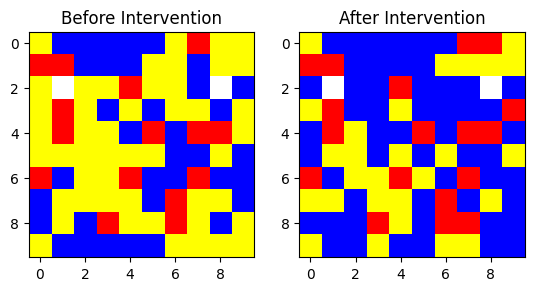

Average score after time 1: 39.40490237472522
Average score after including intervention(s) at time 1: 37.01356143659204


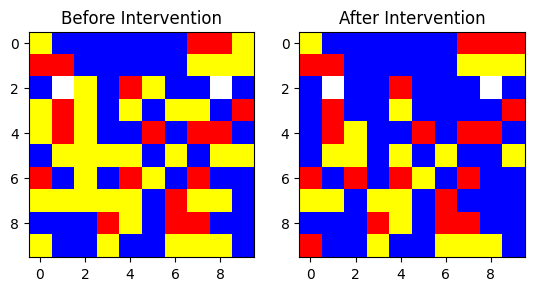

Average score after time 2: 39.74800446093846
Average score after including intervention(s) at time 2: 37.61353591442969


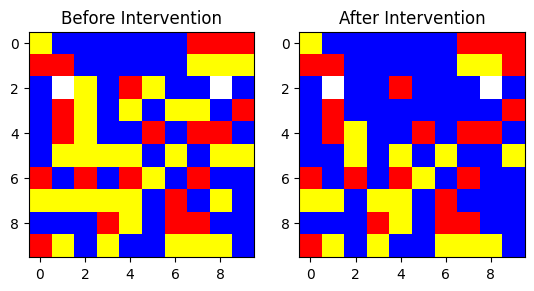

Average score after time 3: 39.844312584478665
Average score after including intervention(s) at time 3: 37.78852106042815


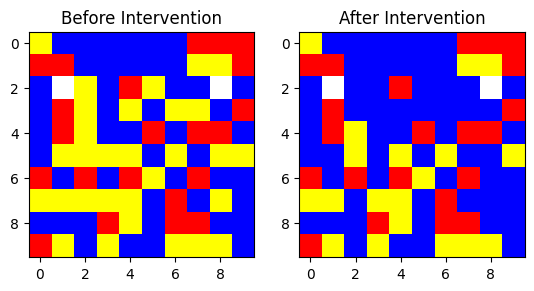

Average score after time 4: 39.79874978062466
Average score after including intervention(s) at time 4: 37.725128129712566


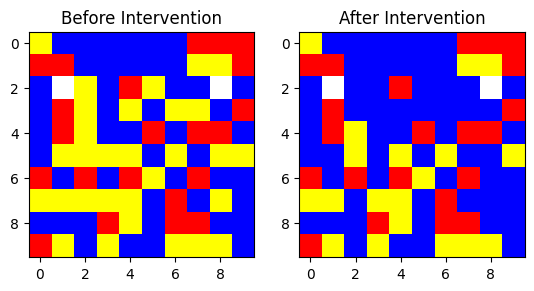

Average score after time 5: 39.72865941267582
Average score after including intervention(s) at time 5: 37.661395296757874


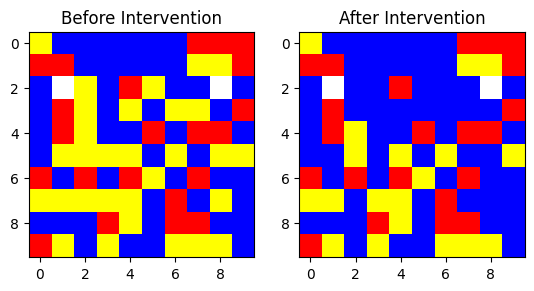

Average score after time 6: 39.6699972622995
Average score after including intervention(s) at time 6: 37.61077017707237


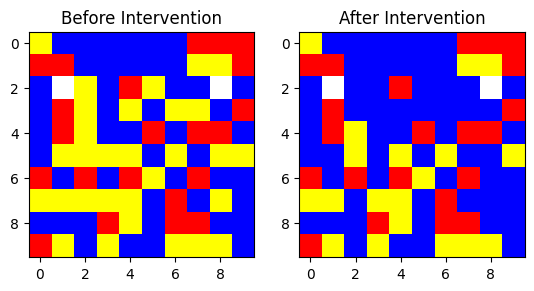

Average score after time 7: 39.62397549413723
Average score after including intervention(s) at time 7: 37.57139074079189


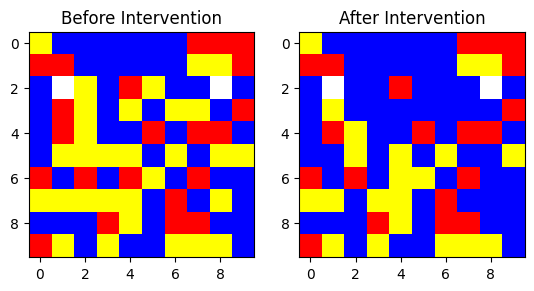

Average score after time 8: 39.150675907987704
Average score after including intervention(s) at time 8: 36.79818468293628


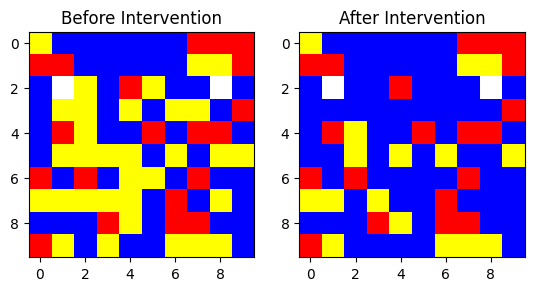

Average score after time 9: 38.593920665951565
Average score after including intervention(s) at time 9: 36.486228813744994


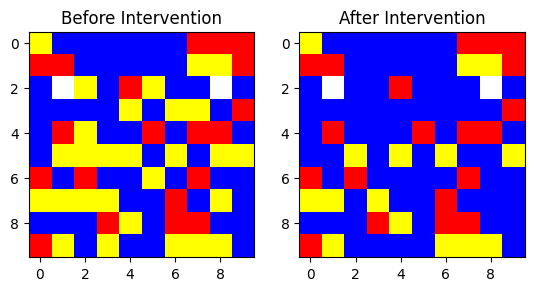

Average score after time 10: 28.255623314172652
Average score after including intervention(s) at time 10: 26.36047689453635


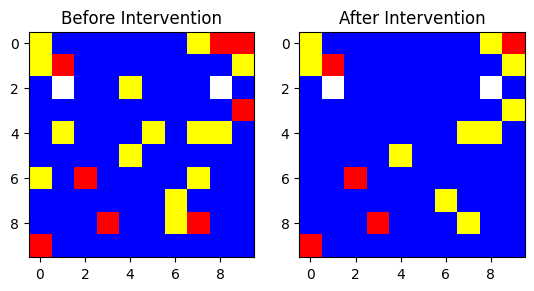

Average score after time 11: 22.793941122886178
Average score after including intervention(s) at time 11: 21.804706073705162


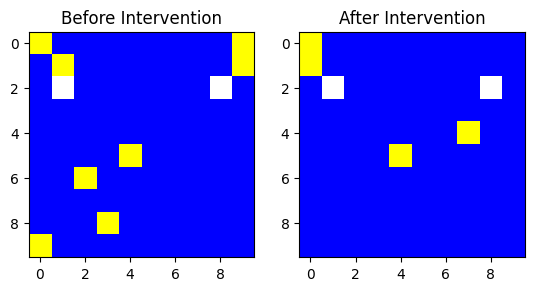

Average score after time 12: 20.812761199304592
Average score after including intervention(s) at time 12: 20.702845175404505


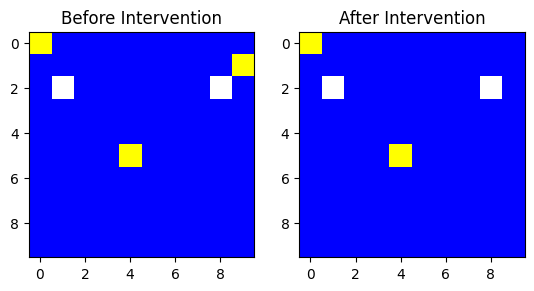

Average score after time 13: 20.43339915751601
Average score after including intervention(s) at time 13: 20.49547009954384


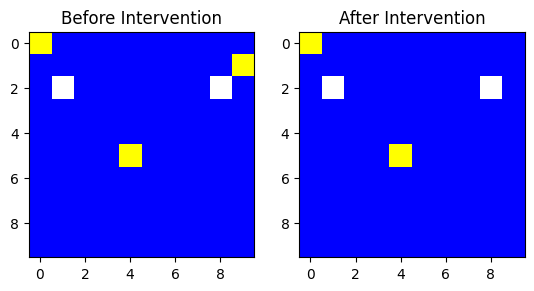

Average score after time 14: 20.36133095533053
Average score after including intervention(s) at time 14: 20.45609091689045


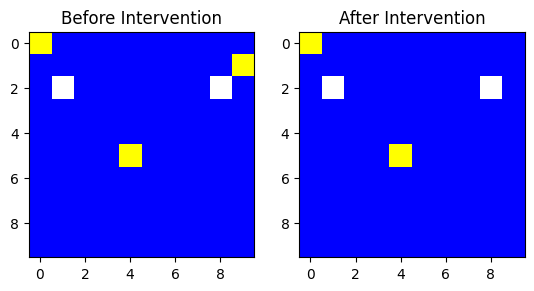

Average score after time 15: 20.347592844092194
Average score after including intervention(s) at time 15: 20.448570190271205


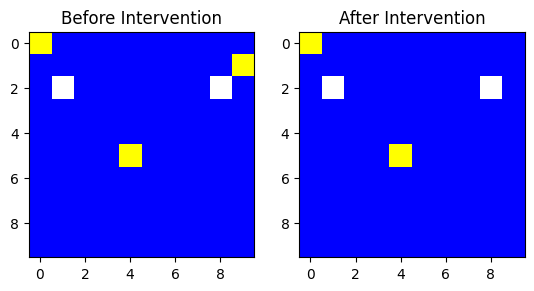

Average score after time 16: 20.344966839180216
Average score after including intervention(s) at time 16: 20.447130485923044


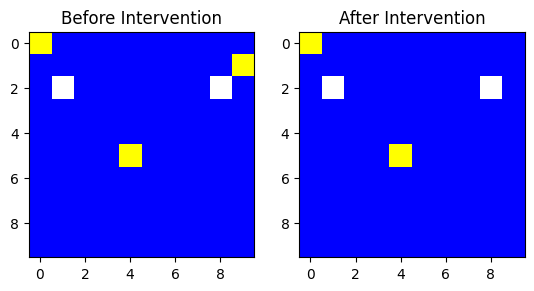

Average score after time 17: 20.344464222995022
Average score after including intervention(s) at time 17: 20.44685468379857


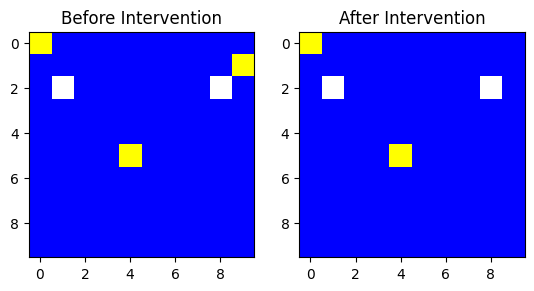

Average score after time 18: 20.344367972777786
Average score after including intervention(s) at time 18: 20.44680184436729


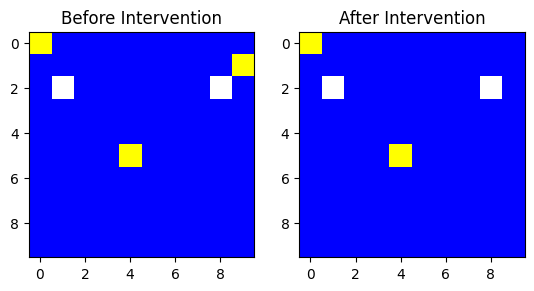

Average score after time 19: 20.344349538395942
Average score after including intervention(s) at time 19: 20.446791722276416


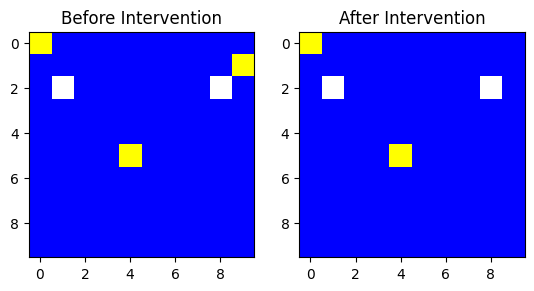

In [ ]:
#Stage Three (Networking- Concept of Multiple Games):
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import defaultdict

np.random.seed(57)
random.seed(57)

# Global variables
num_agents = 100
grid_size = 10
male_percentage = 0.85


class Agent:
    def __init__(self, score, gender, age, advertisement_exposure, favorite_game):
        self.score = score
        self.gender = gender
        self.type = self.determine_type()
        self.age = age
        self.fixed = False
        self.advertisement_exposure = advertisement_exposure
        self.favorite_game = favorite_game
        # OSIS calculation based on previous research factors
        self.OSIS = self.calculate_osis()
        self.color = self.get_color()
        self.positive_interactions = 24
        self.negative_interactions = 14
        self.IQS = self.calculate_iqs()

    def determine_type(self):
        if self.score < 30:  # Assuming Casual players have score < 30
            return "Casual"
        elif self.score < 60:  # Assuming Highly engaged players have score between 30 and 60
            return "Highly engaged"
        else:  # Assuming At-risk of addiction players have score >= 60
            return "At-risk of addiction"

    def get_color(self):
        if self.type == "Casual":
            return (0.0, 0.0, 1.0)  # blue
        elif self.type == "Highly engaged":
            return (1.0, 1.0, 0.0)  # yellow
        else:
            return (1.0, 0.0, 0.0)  # red

    def calculate_osis(self):
        osis = np.random.uniform(0, 50)

        # Adjusting for age (negative correlation)
        osis -= self.age * 0.1

        # Means from the table for different types of players
        if self.type == "Casual":
            osis += 3.23 * 10  # Social Self Efficacy mean value
            osis -= 3.68 * 5   # In-Game Friendship mean value
            osis += 2.80 * 15  # Social Motivation mean value
        elif self.type == "Highly engaged":
            osis += 3.20 * 10
            osis -= 3.81 * 5
            osis += 2.97 * 15
        else:
            osis += 3.01 * 10
            osis -= 3.57 * 5
            osis += 2.91 * 15

        return osis



    def calculate_iqs(self):
        A = 0.31  # positive interaction factor
        B = 0.07  # negative interaction facter
        return A * self.positive_interactions -B * self.negative_interactions


    def get_color(self):
        if self.score >= 60:
            return (1.0, 0.0, 0.0)  # red
        elif self.score >= 30:
            return (1.0, 1.0, 0.0)  # yellow
        elif self.score <= 1:
            return (1.0, 1.0, 1.0)  # white
        else:
            return (0.0, 0.0, 1.0)  # blue



# Age ranges and their corresponding percentages
age_ranges = [
    (0, 14, 0.09),
    (14, 19, 0.31),
    (19, 24, 0.21),
    (24, 30, 0.20),
    (30, 40, 0.13),
    (40, 60, 0.03),
    (60, 100, 0.03)
]

# Generating a list of ages
age_list = []
T0_percent_high_scores = 0.13
for age_range in age_ranges:
    start, end, proportion = age_range
    num_in_range = int(proportion * num_agents)
    ages_in_range = np.random.randint(start, end, num_in_range)
    age_list.extend(ages_in_range)
while len(age_list) < num_agents:
    age_list.extend(np.random.randint(0, 100, num_agents - len(age_list)))

t0 = 0
t1 = 10
t2 = 20

attention_switching_effect_low = 0.11
attention_switching_effect_high = 0.19
Rationalization_Education_effect_low=0.17
Rationalization_Education_effect_high =0.02
Parental_Monitoring_effect_low=0.02
Parental_Monitoring_effect_high=0.10
Perceived_Cost_effect_low=0.13
Perceived_Cost_effect_high=0.02


# Variables for simulation
games = ['game1', 'game2', 'game3']
game_agents = defaultdict(list)
agents = []

# Agent initialization
for i in range(num_agents):
    # Score
    if i < num_agents * T0_percent_high_scores:
        score = np.random.randint(60, 100)
    else:
        score = np.random.randint(0, 60)

    # Gender
    if i < num_agents * male_percentage:
        gender = 'Male'
    else:
        gender = 'Female'

    # Age
    age = age_list.pop(np.random.randint(len(age_list)))

    # Advertisement exposure
    advertisement_exposure = np.random.rand()
    score += advertisement_exposure * 0.1


    # Favourite game
    favorite_game = np.random.choice(games)

    # We create and store agent
    agent = Agent(score, gender, age, advertisement_exposure, favorite_game)
    agents.append(agent)
    game_agents[favorite_game].append(agent)

# Mark 41% of blue agents as fixed
blue_agents = [agent for agent in agents if agent.score < 30]
num_fixed_blue_agents = int(0.41 * len(blue_agents))
for agent in blue_agents[:num_fixed_blue_agents]:
    agent.fixed = True

# Grid
grid = np.zeros((grid_size, grid_size), dtype=object)
for i in range(grid_size):
    for j in range(grid_size):
        index = np.random.randint(num_agents)
        grid[i, j] = agents[index]

# Simulation loop
t2 = 20
for t in range(t2):
    # average score calculation for each agent's neighborhood
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        if agent.fixed: # Skip if the agent is fixed
            continue
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]

        same_game_agents = game_agents[agent.favorite_game]
        same_game_scores = [a.score for a in same_game_agents if a != agent]
        same_game_avg_score = sum(same_game_scores) / len(same_game_scores) if same_game_scores else 0

        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            neighbor_avg_score = (neighbor_avg_score + same_game_avg_score) / 2

            # We update agent's score based on average score of neighbors and decay
            if agent.score > 60:
                agent.score = (((agent.score * 2) + neighbor_avg_score)) / 2.0
                agent.color = agent.get_color()
            elif agent.score <= 1:
                agent.score=0
                agent.color = agent.get_color()
            else:
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()

            decay_rate = 0.651296  # Decay rate for exponential decay
            if t > 9:
                agent.score *= np.exp(-decay_rate)
            agent.color = agent.get_color()
            agent.score = max(0, min(100, agent.score))  # Ensure score is between 0 and 100


    # Again update agent's score based on agent's score, OSIS and IQS

    agent.score = (agent.score + agent.OSIS + agent.IQS) / 3
    #One important assumption here is we assume equal weights to all the three factors for simplicity.
    agent.score = max(0, min(100, agent.score))  # Ensure score is between 0 and 100
    agent.color = agent.get_color()



    # We update grid with updated agents
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        grid[row, col] = agent

    # Average score
    total_score = sum(agent.score for agent in agents)
    average_score = total_score / num_agents
    print(f"Average score after time {t}: {average_score}")


    fig, axs = plt.subplots(1, 2)
    axs[0].imshow([[agent.color for agent in row] for row in grid], interpolation='nearest')
    axs[0].set_title('Before Intervention')

    # Applying intervention and update agent scores
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        if agent.fixed: # Skip if the agent is fixed
            continue
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]

        same_game_agents = game_agents[agent.favorite_game]
        same_game_scores = [a.score for a in same_game_agents if a != agent]
        same_game_avg_score = sum(same_game_scores) / len(same_game_scores) if same_game_scores else 0
        """
        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            if agent.score > 60:
                agent.score *= (1 - 0.19)
                agent.score *= (1 - 0.02)
                agent.score *= (1 - 0.10)
                agent.score *= (1 - 0.02)
                agent.score = (agent.score * 2 + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()
            else:
                agent.score *= (1 - 0.05)
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()

        # Update agent's score based on OSIS and IQS
        agent.score += agent.OSIS * 0.05 + agent.IQS * 0.02
        #agent.score = max(0, min(100, agent.score))  # Ensure score is between 0 and 100
        agent.color = agent.get_color()
        """
        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            if agent.score > 60:
                agent.score *= (1 - attention_switching_effect_high)
                agent.score *= (1 - Rationalization_Education_effect_high)
                agent.score *= (1 - Parental_Monitoring_effect_high)
                agent.score *= (1 - Perceived_Cost_effect_high)
                agent.score = (agent.score * 2 + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()
            elif agent.score <= 1:
                 agent.score=0
            else:
                agent.score *= (1 - attention_switching_effect_low)
                agent.score *= (1 - Rationalization_Education_effect_low)
                agent.score *= (1 - Parental_Monitoring_effect_low)
                agent.score *= (1 - Perceived_Cost_effect_low)
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()
        """
        # We update agent's score based on OSIS and IQS
        agent.score += agent.OSIS * 0.05 + agent.IQS * 0.02
        agent.score = max(0, min(100, agent.score))  # Ensure score is between 0 and 100
        agent.color = agent.get_color()
        """
    # after the score calculations
    total_score = sum(agent.score for agent in agents)
    average_score = total_score / num_agents
    print(f"Average score after including intervention(s) at time {t}: {average_score}")

    axs[1].imshow([[agent.color for agent in row] for row in grid], interpolation='nearest')
    axs[1].set_title('After Intervention')
    plt.show()


#Conclusion#

Our findings suggest that when the artificial society in our Agent-Based Model (ABM) better mirrors real-world dynamics, the interventions become increasingly effective in mitigating addiction. The interventions implemented in our study can potentially be extrapolated to a broader societal context. Therefore, we anticipate positive outcomes in terms of reducing gaming addiction when these interventions are applied in more generalized settings although few limitations and drawback (as explained in the report) are needed to be taken care of.